# Stock Prices Prediction Using AI and Machine Learning

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('GOOG.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-03,29.369913,29.432678,28.194571,28.229937,28.229937,183449044
1,2014-02-04,28.343512,28.767174,28.319103,28.347746,28.347746,112897588
2,2014-02-05,28.477758,28.661818,28.095192,28.473274,28.473274,96139007
3,2014-02-06,28.670786,28.895693,28.581619,28.890711,28.890711,78155853
4,2014-02-07,29.081743,29.337536,28.905655,29.326078,29.326078,105843245
5,2014-02-10,29.185604,29.449615,29.116365,29.213751,29.213751,78099643
6,2014-02-11,29.394073,29.685482,29.195818,29.643389,29.643389,82339476
7,2014-02-12,29.613998,29.638906,29.424212,29.556465,29.556465,69238554
8,2014-02-13,29.408520,29.885483,29.381371,29.885483,29.885483,73731331
9,2014-02-14,29.778631,29.997313,29.708645,29.957710,29.957710,87795852


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,70.006660,70.754178,69.311697,70.048536,70.048536,3.308164e+07
std,37.744098,38.200940,37.346359,37.773976,37.773976,1.724856e+07
min,24.664783,24.730902,24.311253,24.560070,24.560070,1.584340e+05
25%,38.054501,38.441502,37.709999,38.101002,38.101002,2.269213e+07
50%,57.307499,57.925999,56.755501,57.481499,57.481499,2.867000e+07
75%,102.092003,103.489998,100.803001,101.930000,101.930000,3.759600e+07
max,154.009995,155.199997,152.919998,154.839996,154.839996,2.232980e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2517 non-null   float64
 2   High       2517 non-null   float64
 3   Low        2517 non-null   float64
 4   Close      2517 non-null   float64
 5   Adj Close  2517 non-null   float64
 6   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


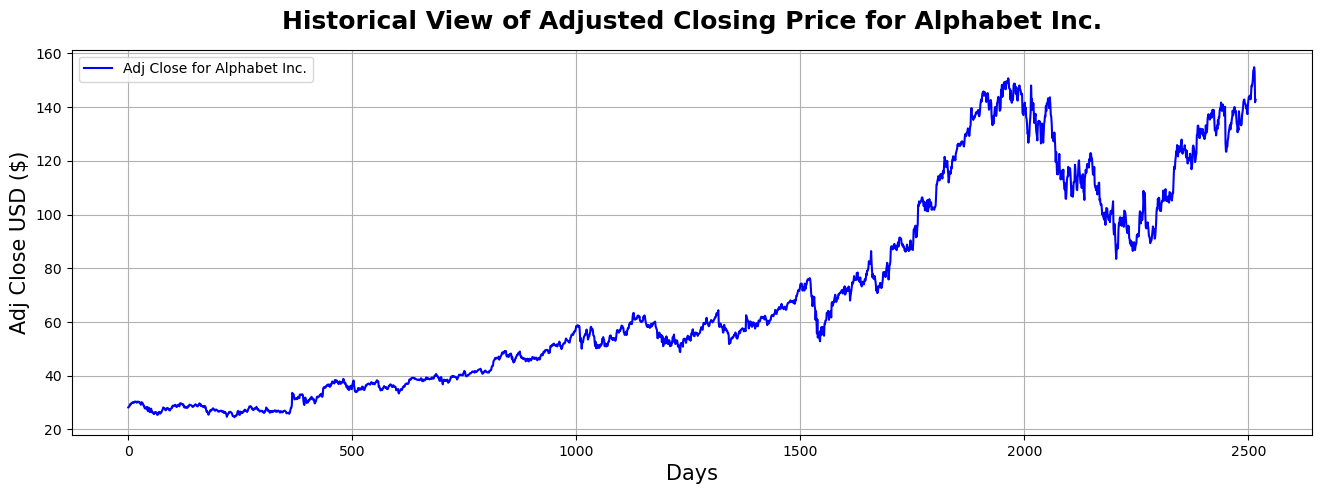

In [5]:
# Plot the adjusted closing price for for Alphabet Inc.
plt.figure(figsize=(16, 5))
df['Adj Close'].plot(label=f"Adj Close for Alphabet Inc.", color = 'blue')
plt.ylabel('Adj Close USD ($)', fontsize=15)
plt.xlabel('Days',fontsize=15)
plt.title(f"Historical View of Adjusted Closing Price for Alphabet Inc.", fontsize=18, fontweight='bold', pad=15)
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Create a dataframe with the 'Adj Close'
filtered_data = df.filter(['Adj Close'])
filtered_data.head()

,Adj Close
0,28.229937
1,28.347746
2,28.473274
3,28.890711
4,29.326078


In [7]:
# Convert the dataframe to a numpy array
data = filtered_data.values

In [8]:
# Scale the training data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_data

array([[-1.10729429],
       [-1.10417488],
       [-1.10085109],
       ...,
       [ 2.1977554 ],
       [ 1.89987214],
       [ 1.92396769]])

In [9]:
# Number of days used for prediction
prediction_days = 60

# Create the training data for the model (using 95% of the dataset)
training_data_len = int(np.ceil( len(data) * 0.95 ))
train_data = scaled_data[0:int(training_data_len), :]

# Create the testing data set
test_data = scaled_data[training_data_len - prediction_days:, :]

x_train, y_train, x_test = [], [], []
y_test = data[training_data_len:, :]

for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i-prediction_days:i, 0])
    y_train.append(train_data[i, 0])
    
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])

# Convert x_train, y_train and x_test to numpy arrays
x_train, y_train, x_test = np.array(x_train), np.array(y_train), np.array(x_test)

# Reshape the x_train and x_test
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [10]:
# LSTM model building
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

# LSTM model complilation with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# LSTM model training
model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1)


Epoch 1/20

73/73 [==============================] - 5s 32ms/step - loss: 0.0481
Epoch 2/20
73/73 [==============================] - 2s 31ms/step - loss: 0.0055
Epoch 3/20
73/73 [==============================] - 2s 32ms/step - loss: 0.0047
Epoch 4/20
73/73 [==============================] - 2s 30ms/step - loss: 0.0049
Epoch 5/20
73/73 [==============================] - 2s 31ms/step - loss: 0.0050
Epoch 6/20
73/73 [==============================] - 2s 31ms/step - loss: 0.0041
Epoch 7/20
73/73 [==============================] - 2s 31ms/step - loss: 0.0038
Epoch 8/20
73/73 [==============================] - 2s 31ms/step - loss: 0.0039
Epoch 9/20
73/73 [==============================] - 2s 33ms/step - loss: 0.0035
Epoch 10/20
73/73 [==============================] - 2s 32ms/step - loss: 0.0033
Epoch 11/20
73/73 [==============================] - 2s 34ms/step - loss: 0.0032
Epoch 12/20
73/73 [==============================] - 3s 35ms/step - loss: 0.0033
Epoch 13/20
73/73 [================

In [11]:
# LSTM model predictions
predictions_lstm = model.predict(x_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

4/4 [==============================] - 1s 14ms/step


In [12]:
# Build and train Random Forest model
regressor = RandomForestRegressor(n_estimators=300, random_state=42)
regressor.fit(x_train.reshape(-1, prediction_days), y_train)

# Random Forest model predictions
predictions_rf = regressor.predict(x_test.reshape(-1, prediction_days))
predictions_rf = scaler.inverse_transform(predictions_rf.reshape(-1, 1))

In [13]:
# Combine predictions of both models (averaging)
predictions = 0.5 * predictions_lstm + 0.5 * predictions_rf

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("Root-mean-square error: {}".format(rmse))

Root-mean-square error: 2.4560779099925067


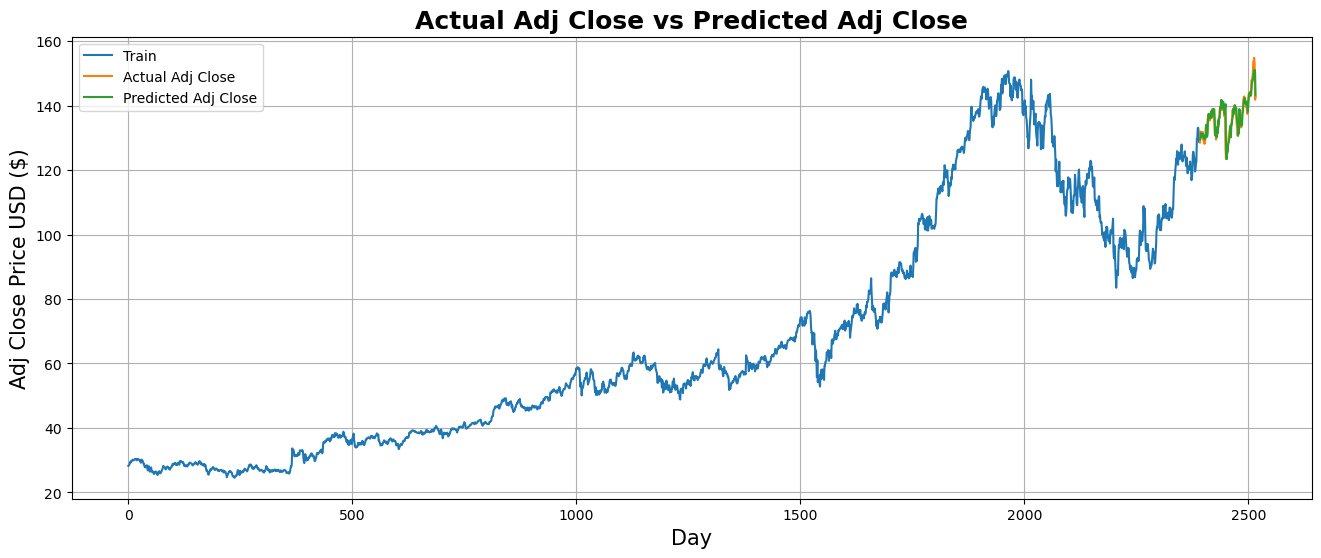

In [14]:
train = filtered_data[:training_data_len]
valid = pd.DataFrame()
valid['Actual Adj Close']=filtered_data[training_data_len:]
valid['Predicted Adj Close'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Actual Adj Close vs Predicted Adj Close', fontsize=18, fontweight='bold')
plt.xlabel('Day', fontsize=15)
plt.ylabel('Adj Close Price USD ($)', fontsize=15)
plt.plot(train['Adj Close'])
plt.plot(valid[['Actual Adj Close', 'Predicted Adj Close']])
plt.legend(['Train', 'Actual Adj Close', 'Predicted Adj Close'])
plt.grid(True)
plt.show()

In [15]:
# Show the actual and predicted prices
valid

,Actual Adj Close,Predicted Adj Close
2392,128.539993,129.437145
2393,131.940002,129.610743
2394,131.839996,131.326705
2395,130.149994,131.517745
2396,130.210007,130.483427
...,...,...
2512,153.789993,150.341409
2513,154.839996,150.669271
2514,153.050003,151.105260
2515,141.800003,150.234283
